<a href="https://colab.research.google.com/github/karthik5443/Deep_Learning/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import re
import codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

LOADING ENGLISH RAW DATA

In [ ]:
eng_df=pd.read_csv("english.csv","utf-8",header=None,names=["English"])
eng_df.head()

<ipython-input-19-b2a0172f4503>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  eng_df=pd.read_csv("english.csv","utf-8",header=None,names=["English"])
<ipython-input-19-b2a0172f4503>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  eng_df=pd.read_csv("english.csv","utf-8",header=None,names=["English"])


,English
0,""" Nature, in the broadest sense, is the natura..."
1,"""""""Nature"""" can refer to the phenomena of the ..."
2,"""The study of nature is a large, if not the on..."
3,"""Although humans are part of nature, human act..."
4,"""[1] The word nature is borrowed from the Old ..."


In [ ]:
fre_df=pd.read_csv("french.csv","utf-8",header=None,names=["French"])
fre_df.head()

<ipython-input-21-2d1f7e153cd8>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  fre_df=pd.read_csv("french.csv","utf-8",header=None,names=["French"])
<ipython-input-21-2d1f7e153cd8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fre_df=pd.read_csv("french.csv","utf-8",header=None,names=["French"])


,French
0,"""Si vous disposez d'ouvrages ou d'articles de ..."
1,"Comment ajouter mes sourcesÂ ?,French"
2,"""Cette page ou section est en train d'Ãªtre tr..."
3,Vous pouvez aider au dÃ©veloppement de WikipÃ©...
4,"""Le mot nature est un terme polysÃ©mique (câ€™..."


In [ ]:
ger_df=pd.read_csv("german.csv","utf-8",header=None,names=["German"])
ger_df.head()

<ipython-input-23-2924e9592370>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ger_df=pd.read_csv("german.csv","utf-8",header=None,names=["German"])
<ipython-input-23-2924e9592370>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ger_df=pd.read_csv("german.csv","utf-8",header=None,names=["German"])


,German
0,""".Wir sind alle auf der Suche nach schnellen W..."
1,"""Ich weiÃŸ, ich verstehe, was passiert, ist, d..."
2,"Wie wÃ¤re es also mit uns?,German"
3,"""Lernen Sie einige intelligente neue englische..."
4,"""Also werden wir heute 10 neue intelligente WÃ..."


In [ ]:
data_eng=["data"]
lang_eng=["language"]
data_fre=["data"]
lang_fre=["language"]
data_ger=["data"]
lang_ger=["language"]

DATA PRE PROCESSING

In [ ]:
for char in string.punctuation:
  print(char, end=" ")

  translate_table =dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [ ]:
for i,line in eng_df.iterrows():
  line=line["English"]
  if len(line)!=0:
      line=line.lower()
      line=re.sub("r\d+","", line)
      line=line.translate(translate_table)
      data_eng.append(line)
      lang_eng.append("English")

In [ ]:
for i,line in fre_df.iterrows():
  line=line["French"]
  if len(line)!=0:
      line=line.lower()
      line=re.sub("r\d+","", line)
      line=line.translate(translate_table)
      data_fre.append(line)
      lang_fre.append("French")

In [ ]:
for i,line in ger_df.iterrows():
  line=line["German"]
  if len(line)!=0:
      line=line.lower()
      line=re.sub("r\d+","", line)
      line=line.translate(translate_table)
      data_ger.append(line)
      lang_ger.append("German")

In [ ]:
df=pd.DataFrame({"Text":data_eng+data_ger+data_fre,
                 "language":lang_eng+lang_ger+lang_fre})
print(df.shape)

(6279, 2)


In [ ]:
df

,Text,language
0,data,language
1,nature in the broadest sense is the natural p...,English
2,nature can refer to the phenomena of the physi...,English
3,the study of nature is a large if not the only...,English
4,although humans are part of nature human activ...,English
...,...,...
6274,quelle a ã©tã© votre erreur nous allons vous n...,French
6275,narcisa a changã© ses maniã¨res elle a luttã© ...,French
6276,comment le narcissisme de s maintenant marian ...,French
6277,atelle je suppose quelle ne voudrait plus de p...,French


SPLLITTING DATA INTO TRAIN AND TEST

In [ ]:
x,y=df.iloc[:,0],df.iloc[:,1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

VECTORIZER AND MODEL FITTING PIPELINE

In [ ]:
vectorizer=feature_extraction.text.TfidfVectorizer(ngram_range=(1,3),analyzer='char')
pipe_lr_r13=pipeline.Pipeline([('vectorizer',vectorizer),
                               ('clf',linear_model.LogisticRegression())])

In [ ]:
pipe_lr_r13.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [ ]:
y_pred=pipe_lr_r13.predict(x_test)

In [ ]:
acc=(metrics.accuracy_score(y_test,y_pred))*100
print(acc,'%')

100.0 %


In [ ]:
matrix=metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix: \n',matrix)

confusion matrix: 
 [[282   0   0]
 [  0 208   0]
 [  0   0 138]]


ValueError: ignored

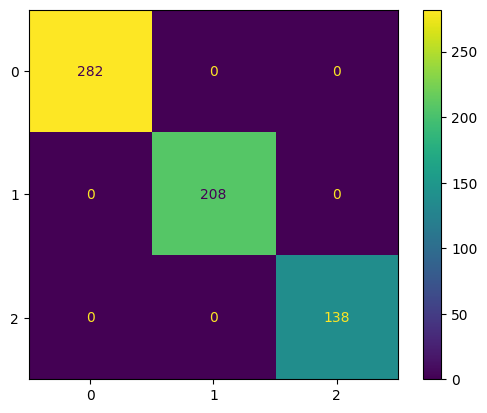

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

MODEL SAVING


In [ ]:
import pickle
lrfile=open('LRModel.pckl','wb')
pickle.dump(pipe_lr_r13,lrfile)
lrfile.close()

MODEL LOADING

In [ ]:
global lrLangDetectModel
lrLangDectFile=open('LRModel.pckl','rb')
lrLangDectModel= pickle.load(lrLangDectFile)
lrLangDectFile.close()

METHOD DEFINATION TO CALL TRAINED MODEL AND MAKE PREDICTIONS

In [ ]:
def lang_detect(text):
  import numpy as np
  import string
  import re
  import pickle
  translate_table = dict((ord(char),None)for char in string.punctuation)

  global lrLangDetectModel
  lrLangDectFile=open('LRModel.pckl','rb')
  lrLangDectModel= pickle.load(lrLangDectFile)
  lrLangDectFile.close()


  text=" ".join(text.split())
  text= text.lower()
  text=re.sub("r\d+","",text)
  text=text.translate(translate_table)
  pred=lrLangDectModel.predict([text])
  prob=lrLangDectModel.predict_proba([text])
  return pred[0]

In [ ]:
lang_detect("Mein Name ist Karthik")

'English'